In [1]:
import json
from pathlib import Path
from girvan_decompose import loadCsv
import networkx as nx
import matplotlib.pyplot as plt
from netgraph import Graph, InteractiveGraph, EditableGraph
from tkinter.filedialog import askopenfilename, asksaveasfile

In [2]:
colorList = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:cyan',
             'tab:olive', 'tab:purple', 'tab:gray', 'tab:brown', 'tab:pink']

In [11]:
def mapGroupSrc(groups: list, funcDict: dict):
    output = []
    i = 0
    for group in groups:
        result = {'group':group, 'src':[], 'name':str(i)}
        for funcName in group:
            src = None
            for lib in funcDict:
                if funcName in funcDict[lib]:
                    src = lib
                    break
            if src is None:
                src = "main program"
            if not src in result['src']:
                result['src'].append(src)
        output.append(result)
        i += 1
    return output

def drawCommFigure(groups: list, funcDict: dict, csvPath: Path, outfile: str):
    _, G = loadCsv(csvPath)
    Ggroup = nx.DiGraph()
    commDict = {}
    labelList = []
    skipList = []
    groupSrcList = mapGroupSrc(groups, funcDict)
    for entry in groupSrcList:
        if len(entry['src']) > 3:
            skipList.append(entry['name'])
    for entry in groupSrcList:
        if entry['name'] in skipList:
            continue
        group = entry['group']
        srcList = entry['src']
        Ggroup.add_node(entry['name'], src=srcList)
        commDict[entry['name']] = str(sorted(srcList))
        if not str(sorted(srcList)) in labelList:
            labelList.append(str(sorted(srcList)))
        for funcName in group:
            for funcNameB in G.neighbors(funcName):
                for entryB in groupSrcList:
                    if entryB['name'] == entry['name'] or entryB['name'] in skipList:
                        continue
                    if funcNameB in entryB['group']:
                        Ggroup.add_edge(entry['name'], entryB['name'])
    colorDict = {labelList[i]:colorList[i] for i in range(len(labelList))}
    print(labelList)
    nodeColor = {node: colorDict[groupName] for node, groupName in commDict.items()}
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 12)
    Graph(Ggroup, node_color=nodeColor, node_edge_width=0, edge_alpha=0.1, node_layout='community', node_shape='d',
          node_layout_kwargs=dict(node_to_community=commDict), edge_layout='bundled', edge_layout_kwargs=dict(k=2000))
#     plt.savefig(outfile)
    # Try adding legend
    # Reference: https://github.com/paulbrodersen/netgraph/blob/master/examples/plot_18_legends.py
    node_proxy_artists = []
    for node in colorDict:
        proxy = plt.Line2D(
            [], [],
            linestyle='None',
            color=colorDict[node],
            marker='o',
            label=node
        )
        node_proxy_artists.append(proxy)
    node_legend = ax.legend(handles=node_proxy_artists, bbox_to_anchor=(1.5, 3), loc='lower left', title='')
    ax.add_artist(node_legend)
    
    
#     plt.legend(colorDict, loc="upper right")
    plt.show()

In [4]:
resultJson = askopenfilename()
with open(resultJson) as file:
    resultList = json.load(file)

In [5]:
dictName = askopenfilename()
with open(dictName) as file:
    funcDict = json.load(file)

In [6]:
csvName = askopenfilename()
csvPath = Path(csvName)

In [8]:
outName = asksaveasfile()

["['libc.a', 'libhydrogen.a']", "['libc.a']", "['libc.a', 'libgcc_eh.a']", "['libgcc_eh.a', 'main program']", "['libc.a', 'libgcc_eh.a', 'main program']", "['libc.a', 'main program']", "['libhydrogen.a']", "['libc.a', 'libgcc.a']", "['libgcc_eh.a']"]


/home/yufei/.local/lib/python3.11/site-packages/netgraph/_node_layout.py:1620: UserWarning: There are no connections within community ['libc.a', 'libgcc_eh.a']. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
/home/yufei/.local/lib/python3.11/site-packages/netgraph/_node_layout.py:1620: UserWarning: There are no connections within community ['libc.a', 'main program']. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
/home/yufei/.local/lib/python3.11/site-packages/netgraph/_edge_layout.py:978: RuntimeWarning: invalid value encountered in divide
  displacement = compatibility * delta / distance_squared[..., None]


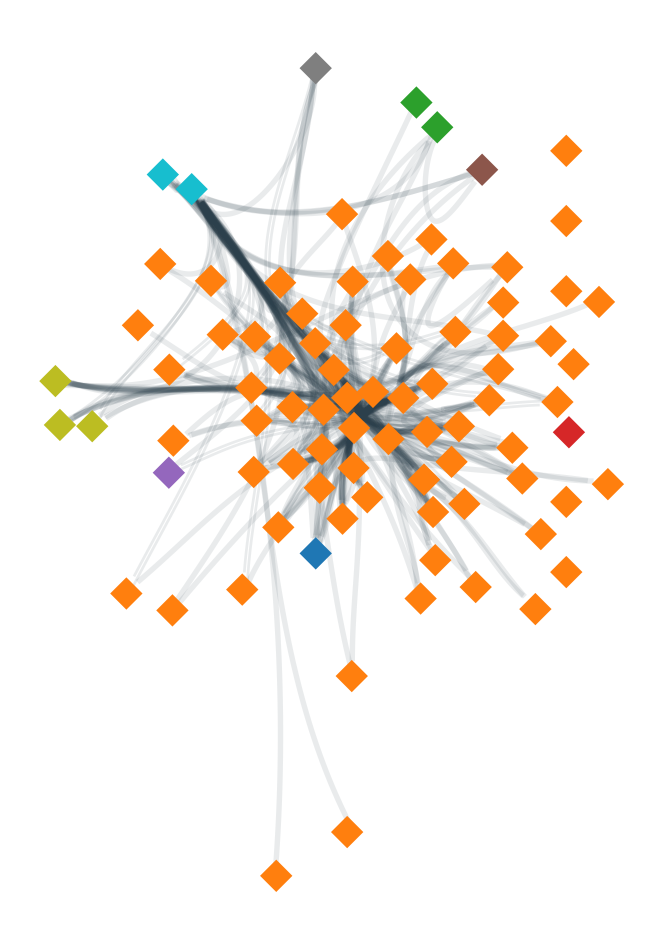

In [12]:
drawCommFigure(resultList, funcDict, csvPath, outName)